## Problématique étudiée

La problématique étudiée est le cas avec le dataset hand-written digits. L'objectif de ce cas est de reconnaître des chiffres annotés à la main à partir d'une base de données disponible.

Il s'agit donc d'un cas de **machine learning supervisé**, et plus spécifiquement d'un cas de **classification**.

Ce notebook va vous guider à travers ce cas concret de classification, et va utiliser un modèle particulier de machine learning pour réaliser cette tâche : le SVM (Machine à vecteurs de support). Les parties suivantes sont dédiées à l'implémentation de ce modèle grâce à l'utilisation de la librairie scikit-learn.

<font color=green>C'est SVM et non vsm.</font>

## Code

In [2]:
# import des librairies l'environnement
import pandas as pd
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [3]:
# chargement de base de données digits
# La première étape est d'importer le dataset et de voir de quoi il est constitué.
# Ici on importe le dataset hand-written digits.
digits = load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
#transforme les données en DataFrame
X = pd.DataFrame(digits.data)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Phase d'apprentissage du modèle

La première étape lors de l'utilisation d'une méthode d'apprentissage supervisée, c'est l'apprentissage. Dans cette étape, nous allons construire notre modèle en lui donnant un certain nombre d'exemples depuis notre base de données. La règle de base lors de cette étape est de séparer la base de données en deux : une partie pour l'apprentissage et une partie pour le test. Ceci afin de ne pas montrer lors de la phase de test des exemples de chiffres qui auraient servis lors de la phase d'apprentissage, car alors le test serait biaisé.

Mais pour pouvoir apprendre un modèle, ce dernier a besoin de features, c'est-à-dire des nombres en entrée, servant à décrire nos images dans un langage compris par la machine. En traitement d'images, la solution la plus simple pour produire ces features consiste à vectoriser l'image, c'est-à-dire passer l'image 8x8 sous forme d'un vecteur de taille 64, dont chaque ligne représente la valeur d'un pixel en niveau de gris. C'est ce que nous faisons juste en-dessous :


In [5]:
# Entrainement des jeux de données
# 80% apprentissage et 20% test

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, digits.target, test_size = 0.2, shuffle=False)

model = SVC()
model.fit(X_Train, Y_Train)
print(model.score(X_Test, Y_Test))

0.9416666666666667


<font color=green>Je pense qu'il faut mieux détailler ce qu'est ton score et son niveau de précision?</font>

Nous sommes donc en possession de 1797 images de 8x8 pixels qui représentent des chiffres de 0 à 9.

3


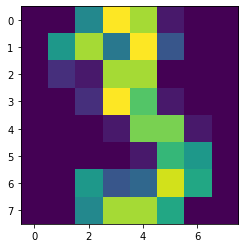

In [6]:
#test d'un nombre. Ici le 3
sample_index = 3
predicted = model.predict(X_Test)
print(model.predict(X)[sample_index])
plt.imshow(digits.images[sample_index])

<font color=green>Je pense qu'il faut un peu mieux détailler ce que tu as fait en code, comment obtiens tu ce 3?, pourquoi y a t il des graduations de chaque côté? </font>

In [7]:
# Affiche les résultats de chaque classe de 0 à 9
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(Y_Test, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.96      0.73      0.83        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.92      0.97      0.95        36
           8       0.78      0.94      0.85        33
           9       0.92      0.89      0.90        37

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360




On constate que les résultats sont globalement corrects, mais que la classe 3 par exemple souffre de quelques difficultés à être correctement classifiée. Il est intéressant de voir que le nombre d'images testées par classe est à peu près égal, ce qui assure une bonne représentativité de chaque classe dans les résultats (on parle de problème équilibré). Il est important de s'assurer de cet équilibre dès la phase d'apprentissage pour être certain de ne pas biaiser l'apprentissage de certaines classes (une classe sous-représentée pourrait être très peu prédite en pratique). On retrouve bien ici que 360 images en test représentent eniron 20 % de 1764 images du jeu de données complet, ce qui est cohérent.

Pour analyser plus finement les résultats, on représente enuite la matrice de confusion, qui montre pour chaque classe le nombre de bonnes et mauvaises classification, et ce de manière croisée pour savoir dans quelles classes ont été prédites les erreurs de classification :


Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  2  0  2  6  0]
 [ 0  0  0  0 34  0  0  0  1  2]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  1  1 33]]


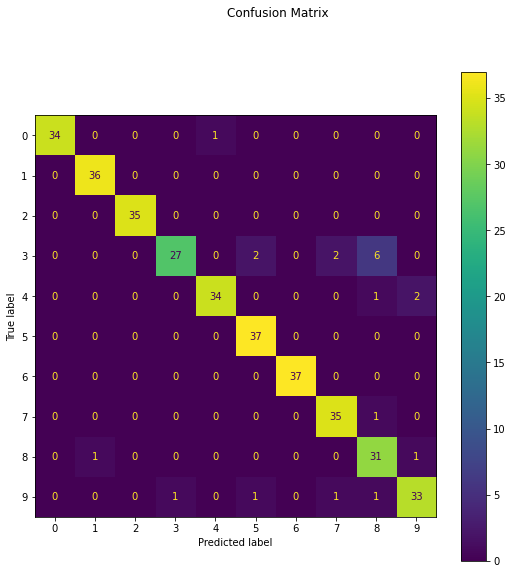

In [8]:
# Plot the confusion matrix

disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_Test, predicted)
disp.figure_.suptitle("Confusion Matrix")
fig = disp.ax_.get_figure() 
fig.set_figwidth(9)
fig.set_figheight(9) 
print(f"Confusion matrix:\n{disp.confusion_matrix}")

On remarque alors que les erreurs observés au global pour la classe 3 se concentrent dans la classe 8, et une analyse plus approfondie peut alors être menée pour déterminer pourquoi ces erreurs se font spécifiquement sur ces classes-là.

<font color=green>C'est un super notebook, tout m'a semblé clair, peut être mettre plus de chapitres pour clarifier les étapes. Bravo!</font>

#### Ceci conclut notre tutoriel, et sentez-vous libre de jouer avec les paramètres du modèle pour mieux le comprendre !